In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100%|█████████████████████████████████████▉| 1.06G/1.06G [01:17<00:00, 15.5MB/s]
100%|██████████████████████████████████████| 1.06G/1.06G [01:18<00:00, 14.7MB/s]


In [ ]:
!mkdir data /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/data

mkdir: /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/data: File exists


In [ ]:
!unzip dogs-vs-cats.zip -d /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/data

Archive:  dogs-vs-cats.zip
  inflating: /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/data/dogs_vs_cats/test/cats/cat.10.jpg  
  inflating: /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/data/dogs_vs_cats/test/cats/cat.10000.jpg  
  inflating: /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/data/dogs_vs_cats/test/cats/cat.10001.jpg  
  inflating: /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/data/dogs_vs_cats/test/cats/cat.10007.jpg  
  inflating: /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/data/dogs_vs_cats/test/cats/cat.10017.jpg  
  inflating: /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/data/dogs_vs_cats/test/cats/cat.10021.jpg  
  inflating: /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/data/dogs_vs_cats/test/cats/cat.10026.jpg  
  inflating: /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/data/dogs_vs_cats/test/cats/cat.10030.jpg  
  inflating: /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from keras import Sequential
from tensorflow.keras.layers import Dense , MaxPool2D, Conv2D, Flatten, BatchNormalization, Dropout

In [2]:
#dir of data folder on my system
mydir = '/Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/data/dogs_vs_cats'
train_dir = os.path.join(mydir, 'train')
test_dir = os.path.join(mydir, 'test')

In [3]:
train = keras.utils.image_dataset_from_directory(
    directory = train_dir,
    labels='inferred',
    label_mode = 'int',
    image_size = (256,256),
    batch_size = 32
)
print('Number of images in single batch:',len(train)) #total number of images in one batch

test = keras.utils.image_dataset_from_directory(
    directory = test_dir,
    labels='inferred',
    label_mode = 'int',
    image_size = (256,256),
    batch_size = 32
)
print('Number of images in single batch:',len(train)) #total number of images in one batch

Found 20000 files belonging to 2 classes.
Number of images in single batch: 625
Found 5000 files belonging to 2 classes.
Number of images in single batch: 625


Visualizing the dataset

[[[ 54.        51.        42.      ]
  [ 54.        51.        42.      ]
  [ 54.        51.        42.      ]
  ...
  [101.29292  103.29292   92.29292 ]
  [102.47461  104.47461   93.47461 ]
  [102.47461  104.47461   93.47461 ]]

 [[ 52.57617   49.57617   40.57617 ]
  [ 52.57617   49.57617   40.57617 ]
  [ 52.57617   49.57617   40.57617 ]
  ...
  [103.041016 105.041016  94.041016]
  [104.       106.        95.      ]
  [104.       106.        95.      ]]

 [[ 50.626953  47.626953  38.626953]
  [ 50.626953  47.626953  38.626953]
  [ 50.626953  47.626953  38.626953]
  ...
  [103.24414  105.24414   94.24414 ]
  [103.25391  105.25391   94.25391 ]
  [103.25391  105.25391   94.25391 ]]

 ...

 [[124.975296 161.9753   180.34834 ]
  [110.8111   147.43805  167.55719 ]
  [112.42728  150.42728  172.65338 ]
  ...
  [214.59766  214.59766  216.59766 ]
  [212.4767   212.4767   214.4767  ]
  [215.5977   215.5977   217.5977  ]]

 [[198.13065  216.00713  220.56963 ]
  [134.36812  159.4917   167.50247 ]


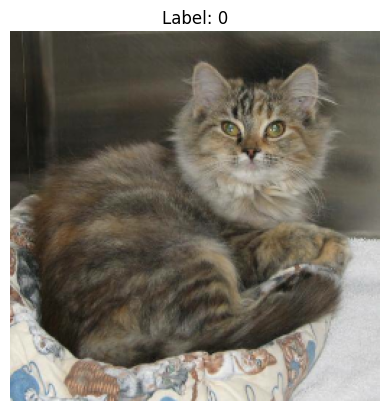

First image label: 0


In [4]:
import matplotlib.pyplot as plt
# Extract the first batch from the dataset
batch = next(iter(train))

# Access images and labels from the batch
images, labels = batch

# Access the first image and label in the batch
first_image = images[0].numpy()  # Convert tensor to numpy array for visualization
first_label = labels[0].numpy()

print(first_image)

# Display the first image
plt.imshow(first_image.astype("uint8"))
plt.title(f"Label: {first_label}")
plt.axis('off')
plt.show()

# Print the label value
print("First image label:", first_label)

In [9]:
#normalization
def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image , label
train_scaled = train.map(process)
test_scaled = test.map(process)

In [6]:
#lets see if we have done normalization (just for reference)
batch = next(iter(train_scaled))
images, labels = batch
first_image = images[0].numpy()
first_label = labels[0].numpy()
print(first_image)

[[[0.43529412 0.42745098 0.44705883]
  [0.4659314  0.45808825 0.4776961 ]
  [0.43275124 0.4249081  0.43697917]
  ...
  [0.44420955 0.47981006 0.49926472]
  [0.4727022  0.51583946 0.53152573]
  [0.56078434 0.6039216  0.61960787]]

 [[0.4423713  0.43452817 0.45413604]
  [0.46148968 0.45364654 0.47325438]
  [0.4416346  0.43379146 0.45039636]
  ...
  [0.4569264  0.4925269  0.51198155]
  [0.5083094  0.5514467  0.56713295]
  [0.6056066  0.64874387 0.66443014]]

 [[0.44705883 0.43789828 0.46014094]
  [0.45597476 0.4468142  0.46905684]
  [0.4550111  0.44585058 0.46809322]
  ...
  [0.4385072  0.47410768 0.49356234]
  [0.5254299  0.56856716 0.58425343]
  [0.6339767  0.67711395 0.6928002 ]]

 ...

 [[0.42144608 0.45281863 0.46066177]
  [0.38575247 0.41712502 0.42496815]
  [0.3346998  0.36230397 0.38522065]
  ...
  [0.46844482 0.46844482 0.4687512 ]
  [0.47947353 0.47944266 0.48737842]
  [0.46672794 0.46541053 0.47720587]]

 [[0.35919118 0.39056373 0.39840686]
  [0.30943555 0.3408081  0.34865123]


In [18]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu')) # Input shape inferred
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(256, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Flatten()) #converting data

model.add(Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.1))
model.add(Dense(32, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid')) # Output layer

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# without normalization
# Epoch 10/10
# 625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 175ms/step - accuracy: 0.8939 - loss: 0.2493 - val_accuracy: 0.7792 - val_loss: 0.6729
##overfitting is happening

In [ ]:
# without strides but with normalization
# 625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 186ms/step - accuracy: 0.9192 - loss: 0.1983 - val_accuracy: 0.8290 - val_loss: 0.4554

#here it reached its peak so we can use early stopping here coz moving forward will not give us any more high results on this data

# Epoch 10/10
# 625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 190ms/step - accuracy: 0.9769 - loss: 0.0634 - val_accuracy: 0.8182 - val_loss: 0.5691

##underfitting is happening

In [19]:
history = model.fit(train_scaled, batch_size = 32 ,epochs = 20, validation_data = test_scaled)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.5672 - loss: 9.6467 - val_accuracy: 0.6180 - val_loss: 1.2363
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.6830 - loss: 1.0012 - val_accuracy: 0.6104 - val_loss: 0.8243
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 93ms/step - accuracy: 0.7270 - loss: 0.7202 - val_accuracy: 0.6742 - val_loss: 0.7908
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.7830 - loss: 0.6843 - val_accuracy: 0.6660 - val_loss: 1.0228
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.8379 - loss: 0.6880 - val_accuracy: 0.6708 - val_loss: 1.0437
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.8622 - loss: 0.6961 - val_accuracy: 0.8608 - val_loss: 0.6842
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.8873 - loss: 0.6849 - val_accuracy: 0.8788 - val_loss: 0.6715
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.9049 - loss: 0.6329 -

we should use early stopping because after 14th iteration there weren't any improvement in the model

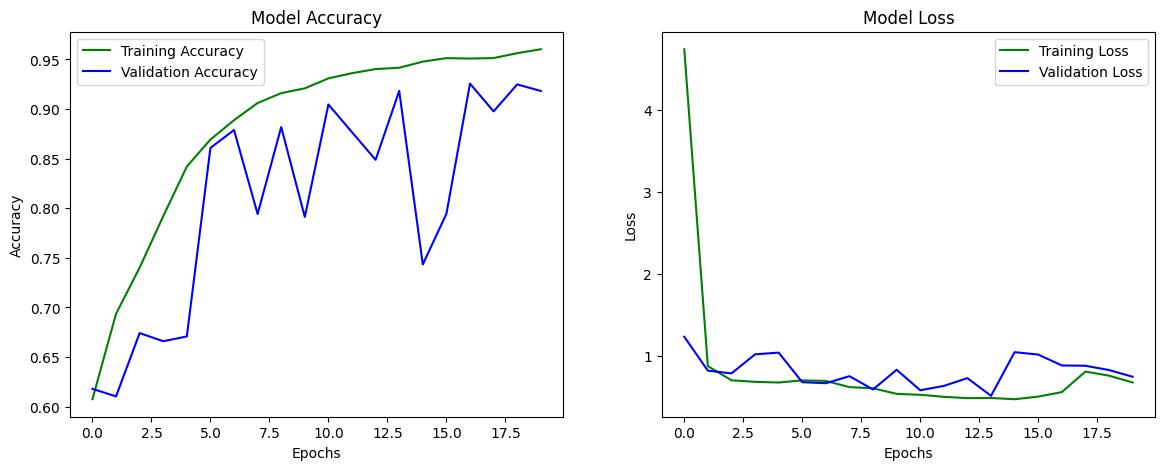

In [28]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='green')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss', color='green')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='blue')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [29]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 91% 199M/218M [00:01<00:00, 130MB/s]
100% 218M/218M [00:01<00:00, 124MB/s]


In [30]:
!mkdir data /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/test_data
!unzip cat-and-dog -d /Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/test_data
#delete as we already have large training dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/test_data/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/test_data/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/test_data/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/test_data/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/test_data/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/test_data/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/test_data/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/test_data/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/test_data/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/test_data/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/test_data/training_set/training_set/cats/cat.3713.jpg  
  inflating: /content/test_data/training_set/training_set/cats/cat.3714.jpg  
  inflating: /

In [35]:
import os
import cv2

def create_test_dataset(image_size, categories, mytestdir):
    dataset = []
    for category in categories:
        folder_path = os.path.join(mytestdir, category)
        category_index = categories.index(category)

        for img in os.listdir(folder_path):
            try:
                image_path = os.path.join(folder_path, img)
                image = cv2.imread(image_path)  # Read the image and we are keeping it in rgb
                image = cv2.resize(image, (image_size, image_size))
                dataset.append([image, category_index])
            except Exception as e:
                print(f"Error processing {img}: {e}")
                pass

    return dataset
# Function call
categories = ['cats', 'dogs']
image_size = 256
mytestdir = '/Users/mnu/Desktop/DeepLearning/CNN/Project/CATs_vs_DOGS/test_data/test_set' #this path is referenced to my system containing this test_ds

testds = create_test_dataset(image_size, categories, mytestdir)

#delete _DS_store file for avoiding error
import numpy as np
X = []
y = []

for image, labels in testds:
    X.append(image)
    y.append(labels)

X = np.array(X)
y = np.array(y)
X=X/255.0 #we normalize it here by dividing it by 255.0


## WE ARE USING DIFFERENT APPROACH HERE BECAUSE DATA IS SMALL AND IT CAN BE EASILY COMPUTED ##
## OTHERWISE FOLLOW SAME PROCESSOR WE HAVE USED ABOVE (image_dataset_from_directory)

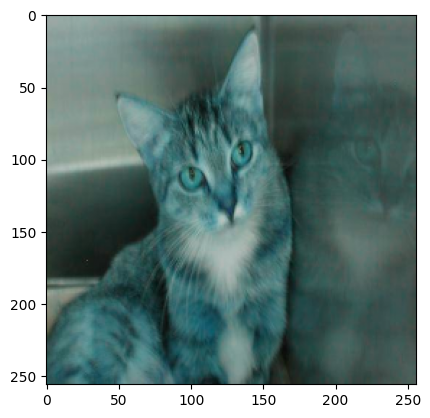

In [42]:
plt.imshow(X[0])

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


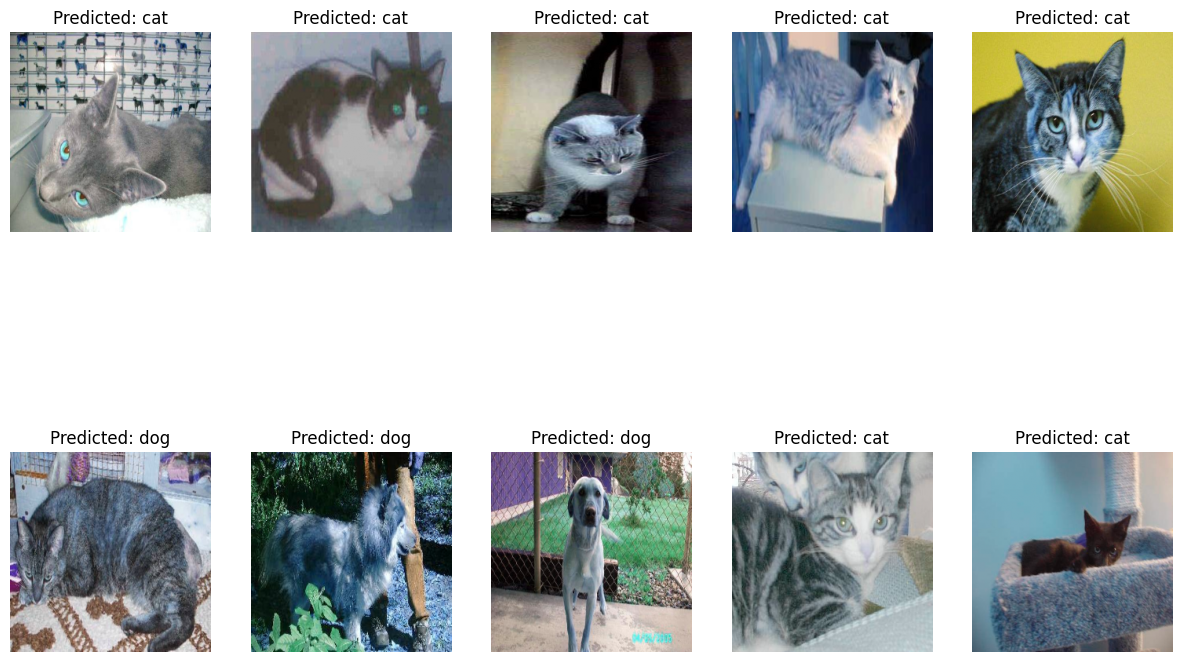

In [43]:
predictions_value = model.predict(X)
mid_probabilty = 0.5
classifications = ['dog' if pred >= mid_probabilty else 'cat' for pred in predictions]

# Visualize 10 random predictions
num_images_to_display = 10
indices = np.random.choice(len(X), num_images_to_display, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)  # Arrange plots in a 2x5 grid
    img = X[idx]  # Get the image
    pred_label = classifications[idx]  # Get the predicted label

    plt.imshow(img)
    plt.title(f"Predicted: {pred_label}")
    plt.axis('off')  # Hide axes

plt.show()
